# **Data Visualisation**

## Objectives

To Analyse the database to determine what part do various factor play in the make up of costs:
* Principally to determine how big a factor BMI, categorised according to recognised levels ( [AmericanCancerSociety](https://www.cancer.org/cancer/risk-prevention/diet-physical-activity/body-weight-and-cancer-risk/body-mass-index-bmi-calculator.html)), and if costs increase dramatically with high level of BMI (obesity)
* To determine how big a factor smoking and age are on costs in comparison to BMI
* Are there multiplier effects - e.g. a combination of high BMI, smoking and age 
* What part to secondary factors such as region and sex play in overall costs

## Inputs

* Data to be read from insurance_cleaned.csv - other links to external sources of information

## Outputs

* Charts/plots to visualise and analyse data:
    * Matplotlib to provide initial visualisations of data
    * Seaborn to show correlations between data
    * Plotly to show more detailed and granular information
* Commentary on visualisations
* How does information presented relate to the objectives above.

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\Projects_Python\\HealthInsuranceAnalysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\Projects_Python\\HealthInsuranceAnalysis'

# Section 1

Load Dataset and visualisation with matplotlib

In [4]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# Load dataset for visualization 
#load insurance_cleaned.csv in Datasets/Processed folder
df = pd.read_csv('Datasets/Processed/insurance_cleaned.csv')
df

,age,sex,bmi,children,smoker,region,charges,bmi_category,charges_category
0,19,0,27.900,0,yes,0,16884.92400,Overweight,Medium
1,18,1,33.770,1,no,1,1725.55230,Obese,Low
2,28,1,33.000,3,no,1,4449.46200,Obese,Low
3,33,1,22.705,0,no,2,21984.47061,Healthy,High
4,32,1,28.880,0,no,2,3866.85520,Overweight,Low
...,...,...,...,...,...,...,...,...,...
1332,50,1,30.970,3,no,2,10600.54830,Obese,Medium
1333,18,0,31.920,0,no,3,2205.98080,Obese,Low
1334,18,0,36.850,0,no,1,1629.83350,Obese,Low
1335,21,0,25.800,0,no,0,2007.94500,Overweight,Low


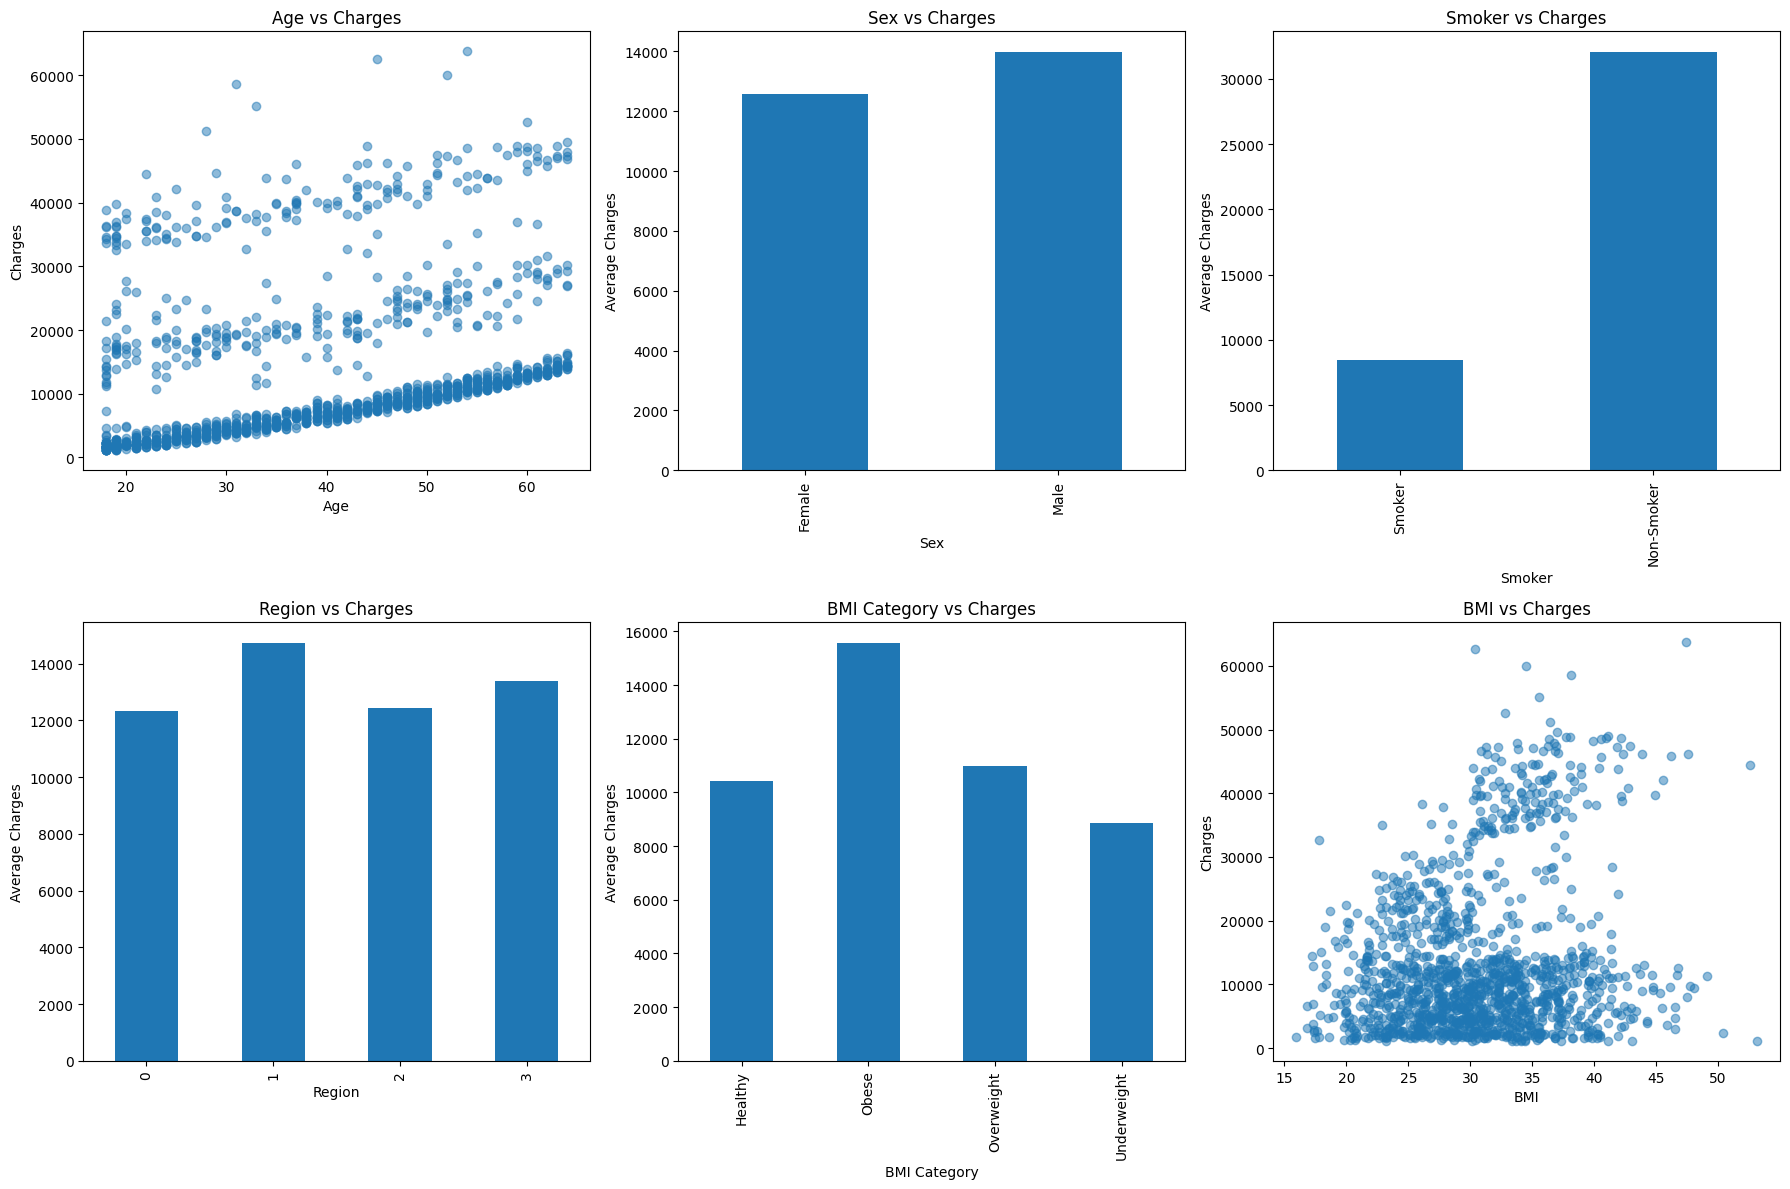

In [6]:
#create plots with matplotlib detailing charges in comparison to age, sex, smoker,region,bmi  and bmi_category
# add plot for BMI vs Charges

plt.figure(figsize=(18, 12))

# Age vs Charges
plt.subplot(2, 3, 1)
plt.scatter(df['age'], df['charges'], alpha=0.5)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

# Sex vs Charges
plt.subplot(2, 3, 2)
df.groupby('sex')['charges'].mean().plot(kind='bar')
plt.title('Sex vs Charges')
plt.xlabel('Sex')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.ylabel('Average Charges')

# Smoker vs Charges
plt.subplot(2, 3, 3)
df.groupby('smoker')['charges'].mean().plot(kind='bar')
plt.title('Smoker vs Charges')
plt.xlabel('Smoker')
#plt.xticks(ticks=[0, 1], labels=['Smoker', 'Non-Smoker']) redundant code after changing smoker back to cat
plt.ylabel('Average Charges')

# Region vs Charges
plt.subplot(2, 3, 4)
df.groupby('region')['charges'].mean().plot(kind='bar')
plt.title('Region vs Charges')
plt.xlabel('Region')
plt.ylabel('Average Charges')

# BMI Category vs Charges
plt.subplot(2, 3, 5)
df.groupby('bmi_category')['charges'].mean().plot(kind='bar')
plt.title('BMI Category vs Charges')
plt.xlabel('BMI Category')
plt.ylabel('Average Charges')

# BMI vs Charges
plt.subplot(2, 3, 6)
plt.scatter(df['bmi'], df['charges'], alpha=0.5)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

#### Analysis ####
As can be seen by the first plot showing the relationship between age and charges there is a steady rise in charges with age, with three distinct bands. There are small but not insignificant variations in charges between regions and according sex. The greatest differential between charges are those between smokers and non-smokers. Finally there are significant variations in charges according to bmi - from the chart showing BMI categories this is particularly striking in the obese classification.

---

# Section 2

Analysis with Seaborn

From the visualisations above it is clear there are strong relationships between charges and age, smoker status and BMI (particularly those classified as obese). In this section we will investigate these relationships further using seaborn visualisations.

In [7]:
#import seaborn
import seaborn as sns

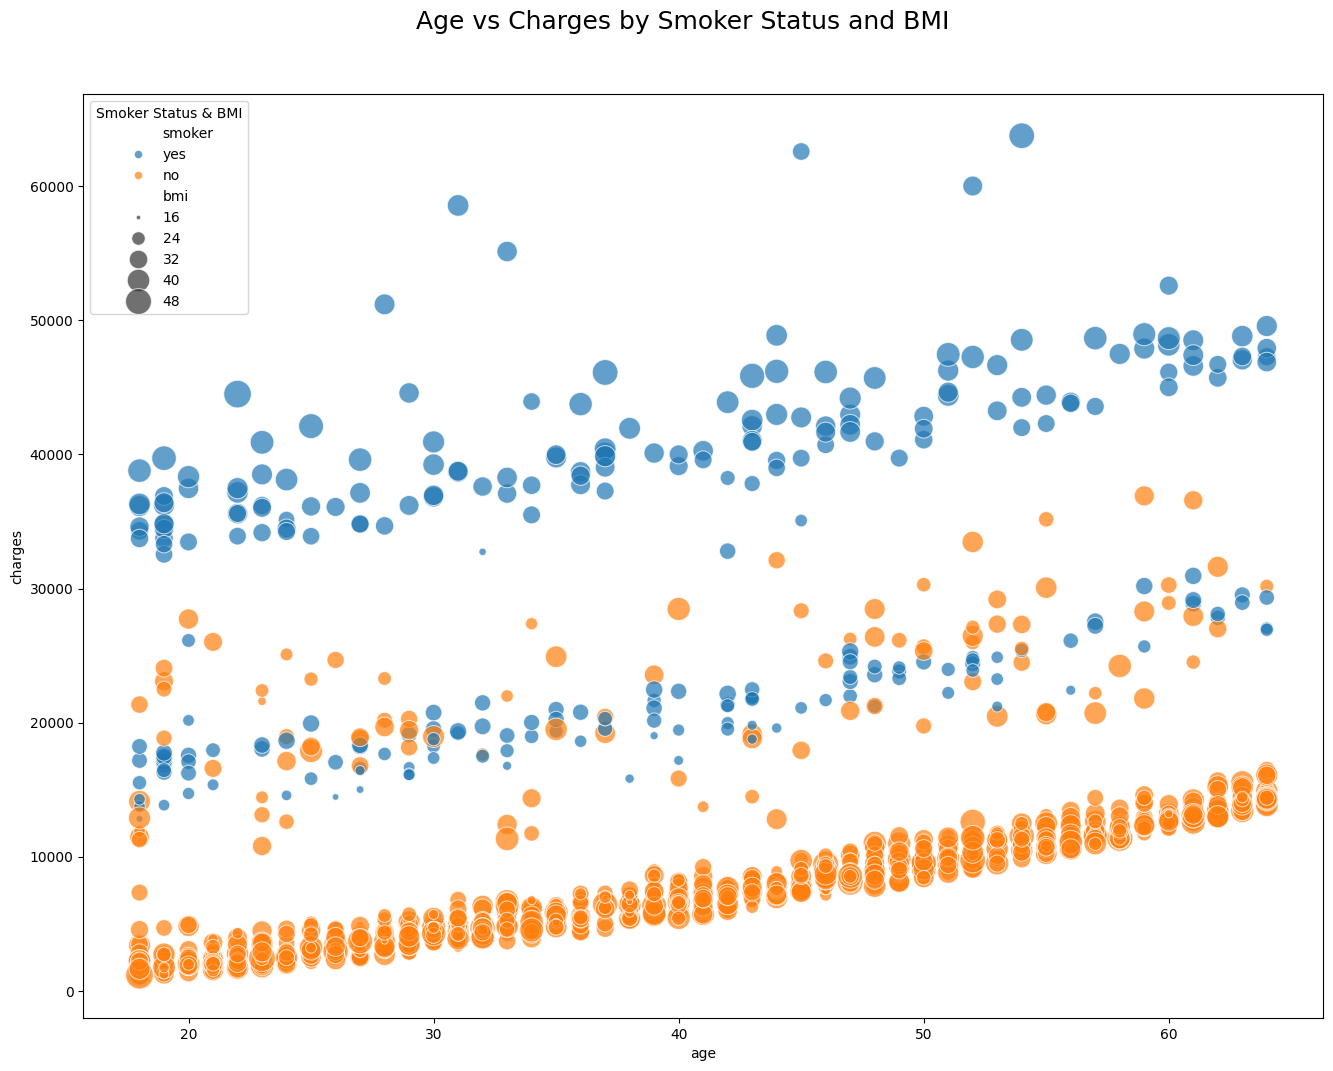

In [17]:
#plot age distribution against charges with colour determined by smoking status and BMI label smoking status smoker=0 non smoker =1
fig, axes = plt.subplots(figsize=(16, 12))
plt.suptitle('Age vs Charges by Smoker Status and BMI', fontsize=18, y=0.95)
scatter = sns.scatterplot(data=df, x='age', y='charges', hue='smoker', size='bmi', sizes=(10, 400), alpha=0.7)
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles=handles, labels=labels, loc='upper left', title='Smoker Status & BMI')

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Conclusions

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.